# Top 250 Football Transfers From 2000 to 2018 - EDA

Dataset: [Top 250 Football Transfers](https://www.kaggle.com/vardan95ghazaryan/top-250-football-transfers-from-2000-to-2018)

Este dataset contiene las 250 transferencias por temporada mas altas desde el 2000 hasta el 2018, tener en consideración que en estaremos manejando la cifras de las transferencias en EUR.

---

En este notebook haremos un pequeno análisis exploratorio aplicando buenas prácticas de la visualización de datos. 

Feedback bienvenido en [@maurogome](twitter.com/maurogome)

---

## Librerias:

### Manipulacion de datos:
- [Pandas](https://pandas.pydata.org/docs/user_guide/index.html)
- [Numpy](https://numpy.org/doc/stable/user/quickstart.html)

### Visualización de datos:
- [Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)
- [Squarify](https://github.com/laserson/squarify)
- [Seaborn](https://seaborn.pydata.org/api.html)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import numpy as np

%matplotlib inline

Para empezar cargamos el dataset y le damos una primera mirada a la información.

In [2]:
df = pd.read_csv("top250-00-19.csv")

In [3]:
df.sort_values('Transfer_fee', ascending = False).head(10)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
4211,Neymar,Left Winger,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017-2018,100000000.0,222000000
4455,Kylian Mbappé,Right Winger,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018-2019,120000000.0,135000000
4212,Philippe Coutinho,Attacking Midfield,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017-2018,90000000.0,125000000
4456,Cristiano Ronaldo,Centre-Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,100000000.0,117000000
4213,Ousmane Dembélé,Right Winger,20,Bor. Dortmund,1.Bundesliga,FC Barcelona,LaLiga,2017-2018,33000000.0,115000000
3961,Paul Pogba,Central Midfield,23,Juventus,Serie A,Man Utd,Premier League,2016-2017,70000000.0,105000000
3217,Gareth Bale,Right Winger,24,Spurs,Premier League,Real Madrid,LaLiga,2013-2014,65000000.0,101000000
2226,Cristiano Ronaldo,Centre-Forward,24,Man Utd,Premier League,Real Madrid,LaLiga,2009-2010,60000000.0,94000000
3962,Gonzalo Higuaín,Centre-Forward,28,SSC Napoli,Serie A,Juventus,Serie A,2016-2017,65000000.0,90000000
3218,Neymar,Left Winger,21,Santos FC,Série A,FC Barcelona,LaLiga,2013-2014,50000000.0,88200000


Al mostrar el dataset ordenado de mayor a menor por el valor de transferencia ya podemos empezar a ver información interesante, por ejemplo: 

1. Encontramos que el jugador por el cual se ha pagado una transferencia mas alta de todos los tiempos (hasta el 2018) es Neymar, por el cual se pago un total de 222.000.000 millones de euros para pasar del Barcelona al PSG.
2. En el top 10 de transferencias, tanto Cristiano Ronaldo, como Neymar aparecen 2 veces. Cristiano por la transferencia del Manchester United al Real Madrid en el 2009 y despues del Real Madrid a la Juve en el 2018, y Neymar por la transferencia al Barcelona en el 2013 y despues al PSG en el 2017.
3. El Barcelona es el equipo que mas apariciones tiene en el top 10 con 3 de las compras mas costosas (Neymar, Coutinho y Dembele), seguido por el Real Madrid, el PSG y la Juve cada uno con 2 compras.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


Encontramos que tenemos todo el dataset muy limpio, no hay datos nulos a excepcion de la columna 'Market_value' donde tenemos mas de mil datos nulos. Para fines practicos de este ejercicio descartaremos esta columna

In [5]:
df.drop('Market_value', axis=1, inplace=True)

## Gráfico de Rectangulo

Un Gráfico de Rectangulo nos muestra los datos organizados en jerarquia de dimensiones. Es decir, el rectangulo mas grande es el mas representativo y a medida que disminuyen su tamano, va disminuyendo su peso.

Para este ejemplo vamos a analizar que transferencias se han realziado, segun la posicion de los jugadores.

Veamos cuales son las posiciones:

In [7]:
df['Position'].unique()


array(['Right Winger', 'Centre-Forward', 'Left Winger', 'Centre-Back',
       'Central Midfield', 'Attacking Midfield', 'Defensive Midfield',
       'Second Striker', 'Goalkeeper', 'Right-Back', 'Left Midfield',
       'Left-Back', 'Right Midfield', 'Forward', 'Sweeper', 'Defender',
       'Midfielder'], dtype=object)

In [8]:
position = df['Position'].value_counts().rename_axis('Position').reset_index(name='counts')
position

,Position,counts
0,Centre-Forward,1218
1,Centre-Back,714
2,Central Midfield,487
3,Attacking Midfield,426
4,Defensive Midfield,411
5,Right Winger,305
6,Left Winger,267
7,Left-Back,225
8,Right-Back,181
9,Goalkeeper,180


Veamos que tenemos las ultimas cuatro posiciones con muy pocas repeticiones, para fines practicos, las cambiaremos por una posicion homologa, y modificamos algunos nombres por fines esteticos (Mi TOC, perdon...):

In [9]:
df['Position'] = df['Position'].replace(['Sweeper', 'Defender'], 'Defensive Midfield')
df['Position'] = df['Position'].replace(['Forward'], 'Centre Forward')
df['Position'] = df['Position'].replace(['Midfielder'], 'Defensive Midfield')
df['Position'] = df['Position'].replace(['Centre-Forward'], 'Centre Forward')
df['Position'] = df['Position'].replace(['Centre-Back'], 'Centre Back')
df['Position'] = df['Position'].replace(['Left-Back'], 'Left Back')
df['Position'] = df['Position'].replace(['Right-Back'], 'Right Back')

Ya vimos en la tabla anterior los valores de cada posicion, ahora veamolo de forma grafica para una mejor retencion cognitiva:

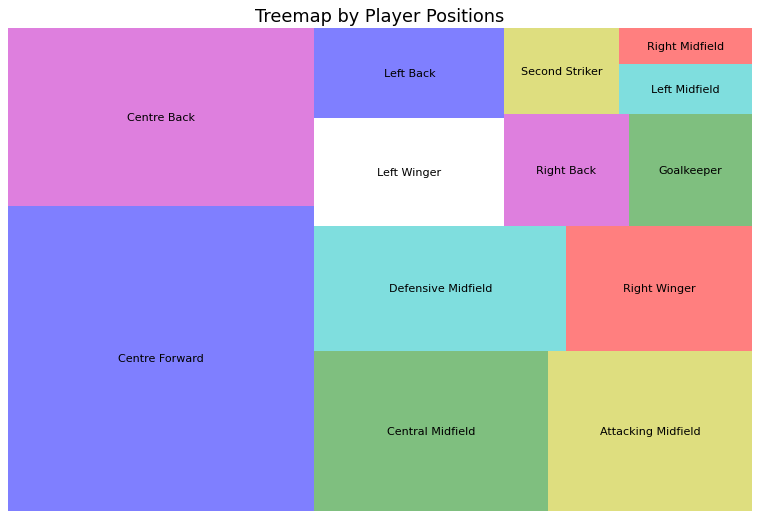

In [10]:
position = df['Position'].value_counts().rename_axis('Position').reset_index(name='counts')

sizes = position['counts']
names = position['Position']
color = ['b','m','g','y','c','r','w']
plt.figure(figsize = (12,8), dpi=80)

squarify.plot(sizes = sizes, label = names, alpha = 0.5, color = color)
plt.axis('off')
plt.title('Treemap by Player Positions', fontsize = 16)
plt.show()

Ahora ya sabemos que los jugadores mas cotizados son los delanteros centrales, realmente esto no era un secreto, pero ahora lo confirmamos con numeros...

## Ligas con mayores compras

Veamos de todas las ligas, cual es la que ha realizado un total de compras mayor

In [11]:
grouped_league_to = df.groupby('League_to')['Transfer_fee'].aggregate([min,np.mean,max,sum]).sort_values('sum', ascending = False).reset_index().head(10)
grouped_league_to

,League_to,min,mean,max,sum
0,Premier League,950000,1.170016e+07,105000000,14695400000
1,Serie A,900000,1.019651e+07,117000000,7535220000
2,LaLiga,950000,1.272450e+07,125000000,6680360000
3,Ligue 1,1000000,9.276373e+06,222000000,3682720000
4,1.Bundesliga,825000,8.529964e+06,43000000,3599645000
5,Premier Liga,1000000,6.749573e+06,40000000,2213860000
6,Super League,1200000,9.756393e+06,60000000,1190280000
7,Liga NOS,1000000,6.295748e+06,22000000,799560000
8,Süper Lig,1000000,4.770140e+06,17050000,682130000
9,Eredivisie,950000,5.046296e+06,16250000,545000000


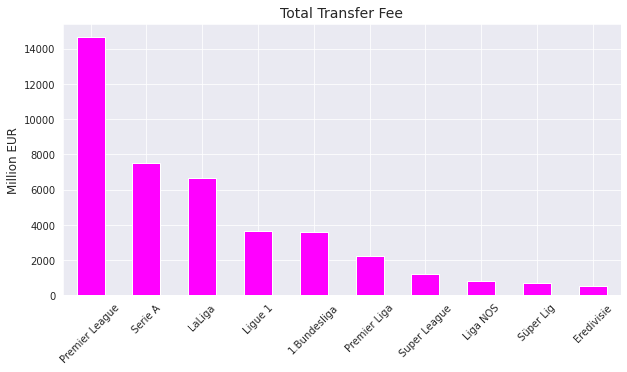

In [12]:
sns.set_style("darkgrid")


fig, ax = plt.subplots(figsize = (10,5))
(grouped_league_to['sum']/1000000).sort_values(ascending = False).plot(kind = 'bar', color = 'magenta')
plt.xticks(range(len(grouped_league_to['League_to'])), grouped_league_to['League_to'], rotation = 45)
plt.ylabel('Million EUR', fontsize = 12)
plt.title('Total Transfer Fee', fontsize = 14)
           
plt.show()

Sorpresivamente encontramos que la liga que mas ha pagado en transferencias es la Premier que solo tenia 1 aparicion en el top 10 de transferencias. Podiamos haber pensado que el primero era la liga ya que tenia la mitad de las transferencias del top 10, pero en este grafico de barras vemos muy claramente que el primer puesto del podium es para la Premier league, con mas de 14000 millones de euros en compras y llevandole casi el doble de ventaja a la Serie A que tiene el segundo puesto (Como referencia para dimensionar la cantidad de dinero de la que estamos hablando, a SpaceX le vale aproximadamente 50 millones de euros lanzar un Falcon 9: [fuente](es.wikipedia.org/wiki/Falcon_9))

Es una buena practica de la visualizacion de datos, en el grafico de barras, organizarlo de mayor a menor para reducir la carga cognitiva de nuestra audiencia. Esto siempre y cuando sea posible, por ejemplo si estamos analizando una linea temporal no podemos alterar el orden de los datos!

## Premier League

Hagamos un analisis rapido de la Premier League ya que nos sorprendio con un rotundo primer lugar:

Cambiamos el nombre de los Spurs por Tottenham, ya que este es su nombre oficial... Spurs es un apodo.

In [13]:
df['Team_to'] = df['Team_to'].replace(['Spurs'], 'Tottenham')

In [14]:
premier = df['League_to'] == 'Premier League'
df_premier = df[premier]
df_premier.sort_values('Transfer_fee', ascending = False).head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee
3961,Paul Pogba,Central Midfield,23,Juventus,Serie A,Man Utd,Premier League,2016-2017,105000000
4214,Romelu Lukaku,Centre Forward,24,Everton,Premier League,Man Utd,Premier League,2017-2018,84700000
4215,Virgil van Dijk,Centre Back,26,Southampton,Premier League,Liverpool,Premier League,2017-2018,78800000
3713,Kevin De Bruyne,Attacking Midfield,24,VfL Wolfsburg,1.Bundesliga,Man City,Premier League,2015-2016,76000000
3469,Ángel Di María,Right Winger,26,Real Madrid,LaLiga,Man Utd,Premier League,2014-2015,75000000


Despues de haber filtrado todo nuestro data set solo para la Premier league, encontramos que tres de las primeras cinco transferencias mas costosas le perteneces al Manchester United, siendo Pogaba la mas costosa por 105 millones de euros en el 2016 (Esta transferencia esta en el sexto lugar de todo el dataset).

Ahora veamos graficamente el comportamiento del mercado en la Premier:

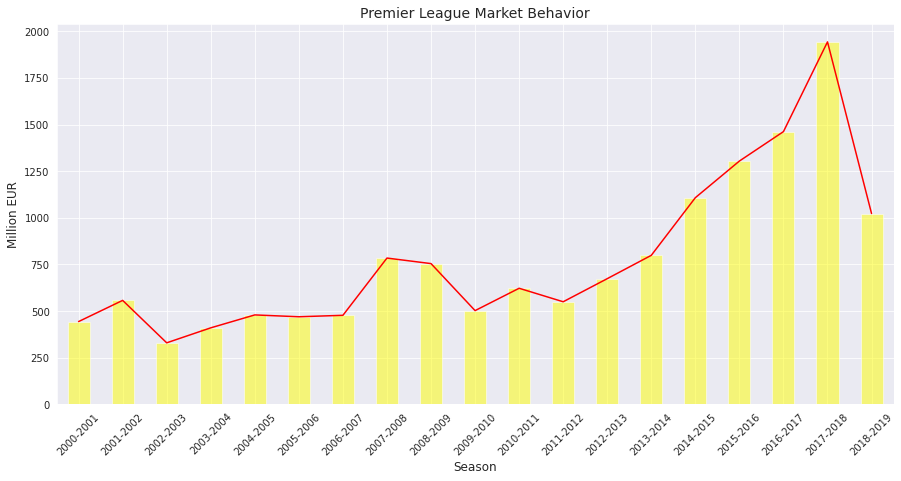

In [15]:
grouped_df_premier = df_premier.groupby('Season')['Transfer_fee'].aggregate(['sum']).reset_index()

fig, ax = plt.subplots(figsize = (15,7))
(grouped_df_premier['sum']/1000000).plot(color = 'red')
(grouped_df_premier['sum']/1000000).plot(kind = 'bar', color = 'yellow', alpha = 0.5)
plt.xticks(range(len(grouped_df_premier['Season'])),grouped_df_premier['Season'], rotation = 45)
plt.ylabel('Million EUR', fontsize = 12)
plt.xlabel('Season', fontsize = 12)
plt.title('Premier League Market Behavior', fontsize = 14)

plt.show()

Del grafico anterior podemos ver que el mercado era realmente muy estable desde el 2000 hasta el 2012 con un total en transferencias anualaes de 600 millones de euros, pero en el 2012 empezo a crecer dramaticamente hasta alcanzar su record en la temporada 2017-2018 de aproximadamente 19000 millones de euros.

Busquemos cuales son los equipos que mas mueven este grafico:

In [16]:
df_grouped_teams = df_premier.groupby(['Team_to', 'Season'])['Transfer_fee'].aggregate('sum').reset_index()
df_grouped_teams

,Team_to,Season,Transfer_fee
0,Arsenal,2000-2001,53300000
1,Arsenal,2001-2002,31250000
2,Arsenal,2002-2003,10730000
3,Arsenal,2003-2004,30250000
4,Arsenal,2004-2005,11700000
...,...,...,...
353,Wolves,2003-2004,9500000
354,Wolves,2009-2010,7600000
355,Wolves,2010-2011,14050000
356,Wolves,2011-2012,11750000


In [17]:
top_5_teams = df_premier.groupby('Team_to')['Transfer_fee'].aggregate('sum').sort_values(ascending = False).reset_index().head(5)
top_5_teams

,Team_to,Transfer_fee
0,Chelsea,1820650000
1,Man City,1779660000
2,Man Utd,1497360000
3,Liverpool,1412420000
4,Tottenham,1024400000


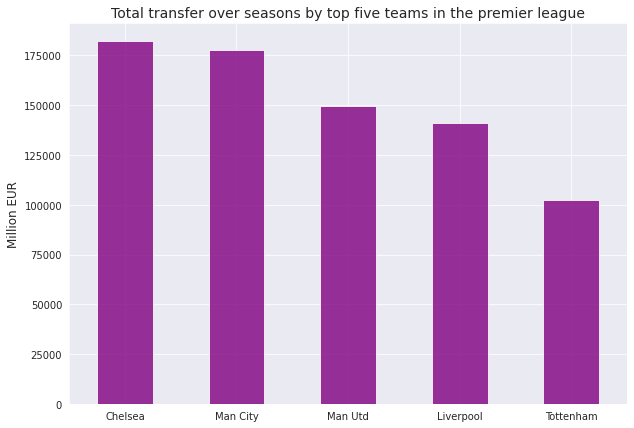

In [18]:
fig, ax = plt.subplots(figsize = (10,7))

(top_5_teams['Transfer_fee']/10000).plot(kind = 'bar', color = 'purple', alpha = 0.8)
plt.xticks(range(len(top_5_teams['Team_to'])), top_5_teams['Team_to'], rotation = 'horizontal')
plt.ylabel('Million EUR', fontsize = 12)
plt.title('Total transfer over seasons by top five teams in the premier league', fontsize = 14)

plt.show()

En el grafico anterior vemos que el podium de transferencias en la premier league se lo llevan el Chelsea, el City y el Manchester United, siendo el Chelsea el campeon indiscutible con 175000 millones de euros en los 20 a~nos que analizamos en este dataset.

Ahora veamos el comportamiento en el tiempo de los campeones de las compras en la Premier League:

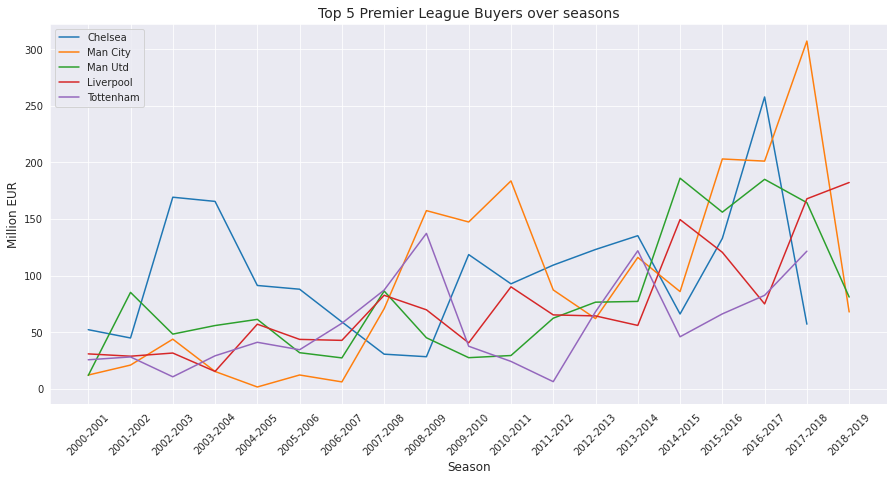

In [19]:
fig, ax = plt.subplots(figsize = (15,7))

for team in range(len(list(top_5_teams['Team_to']))):
    top_team = df['Team_to'] == top_5_teams['Team_to'][team]
    df_top_team = df[top_team]
    grouped_df_top_team = df_top_team.groupby('Season')['Transfer_fee'].aggregate(['sum']).reset_index()
    (grouped_df_top_team['sum']/1000000).plot()
    plt.legend(list(top_5_teams['Team_to']))

plt.xticks(range(len(grouped_df_premier['Season'])),grouped_df_premier['Season'], rotation = 45)
plt.ylabel('Million EUR', fontsize = 12)
plt.xlabel('Season', fontsize = 12)
plt.title('Top 5 Premier League Buyers over seasons', fontsize = 14)    
    
plt.show()

## Conclusiones / Comentarios

1. Aunque el Chelsea es el equipo con mas dinero en compras de la Premier, no se puede concluir que este sea el equipo con mas dinero en compras del dataset, para poder concluir esto debemos hacer el mismo analisis pero con el dataset completo.
2. De nuestro grafico de rectangulos podemos concluir inmediatamente que los delanteros centrales son los jugadores mas codiciados.
3. Nunca nos podemos dejar llevar por ningun sesgo, al ver las 10 transferencias mas altas de la historia, facilmente podiamos concluir que La Liga era la que mas habia gastado en transferencias, pero hubieramos cometido un error.

## Reto

Este apenas es un pequeno analisis y todavia podemos seguir respondiendo muchas preguntas, por lo que aqui te dejo varios retos para que pongas en practica tus habilidades, y comparteme los resultados en [twitter](twitter.com/maurogome)

1. Cual es el equipo con mayores ganancias del dataset? y cuanto ha ganado?
2. Cual ha sido el portero mas costoso?
3. Cual es el equipo que ha gastado mas dinero? cuanto gasto? y cuantas compras realizo?
4. Cual es la liga que mas dinero ha recibido por total de transferencias?

***In Metrics We Trust***